# Estudo sobre a evolução do virus Covid-19 (CORONAVÍRUS)

> [Autor](https://www.linkedin.com/in/alberto-oliveira-barbosa/)

# Fontes dos dados
> [Repositório Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)  
> [Daily reports](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)  
> [Time Series](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)


# Avisos

- Os dados das fontes são atualizados no final do dia, por isso dependendo do horário que o notebook for usado, ele pode ou não, conter os dados mais atuais do repositório.  
- Como os dados foram disponibilizados na internet de forma **pública**, o autor não se responsabiliza pela manutenção dos repositórios com os dados nem a exatidão deles com outras fontes, sendo estas, oficiais ou não.  
- Este é um projeto desenvolvido para **fins de estudo**, e tal qual, não tem por objetivo servir de guia ou referência oficial sobre o caso.

# Import de bibliotecas e configurações do notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# configuração global dos gráficos
plt.rcParams['figure.figsize'] = (11,6)

# Funções:

In [102]:
# Verifica se a ultima data é válida
# caso o campo de data esteja em branco, ele pega a coluna anterior a ela

def valida_dados(dados, tipo_dataset):
    
    coluna = -1
    data_atualizada = dados.columns[coluna]

    while (dados[data_atualizada].isna().mean() == 1):
        coluna = coluna - 1
        data_atualizada = dados.columns[coluna]

    mes, dia, ano = data_atualizada.split('/')
    data_formatada  = '/'.join((dia, mes,ano))
    
    print('\n', tipo_dataset)
    print('Ultima coluna do dataset: ', dados.columns[-1])
    print('Ultima data com valores válidos: ',data_atualizada)
    print('Data formatada: ',data_formatada)
    return (data_atualizada, data_formatada)

In [103]:
def plot_total_casos_pais(dados, pais, titulo=None, data_inicial = None, data_final = None):
    dados.groupby('Country/Region').sum().loc[pais][2:][data_inicial:data_final].plot()
    plt.title(titulo, fontsize=18)
    plt.xlabel('Data  (formato: MES/DIA/ANO)')
    plt.ylabel('Total de Casos')
    plt.show()

In [104]:
def plot_novos_casos_pais(dados, pais, titulo=None, data_inicial = None, data_final = None):
    dados.groupby('Country/Region').sum().loc[pais][2:][data_inicial:data_final].diff().plot()
    plt.title(titulo, fontsize=18)
    plt.xlabel('Data  (formato: MES/DIA/ANO)')
    plt.ylabel('Total de Casos')
    plt.show()

---

# Carga e validação dos dados

In [105]:
casos_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortes_confirmadas = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


In [107]:
# valida os dados que serão usados nessa analise
data_atual_confirmados, data_atual_confirmados_formatada = valida_dados(casos_confirmados, 'Dataset de Casos Confirmados')
data_atual_mortes,data_atual_mortes_formatada = valida_dados(mortes_confirmadas, 'Dataset de Mortes Confirmadas')
#data_atual_recuperados = valida_dados(casos_recuperados, 'Dataset de Casos Recuperados')


 Dataset de Casos Confirmados
Ultima coluna do dataset:  9/20/20
Ultima data com valores válidos:  9/20/20
Data formatada:  20/9/20

 Dataset de Mortes Confirmadas
Ultima coluna do dataset:  9/20/20
Ultima data com valores válidos:  9/20/20
Data formatada:  20/9/20


## Dados Sobre Casos Confirmados
### Descrições estatísticas e informações sobre os dados

In [108]:
# primeros registros
casos_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991


In [109]:
casos_confirmados.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.070726e+05,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157053e+05,1.162970e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.620620e+05,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.075436e+05,6.097996e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.667500e+02,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.320500e+03,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.345200e+04,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.443652e+06,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.764970e+06,6.804814e+06


In [110]:
casos_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 247 entries, Province/State to 9/20/20
dtypes: float64(2), int64(243), object(2)
memory usage: 513.4+ KB


In [111]:
casos_confirmados.shape

(266, 247)

In [112]:
# nome das colunas
casos_confirmados.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/11/20', '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20',
       '9/17/20', '9/18/20', '9/19/20', '9/20/20'],
      dtype='object', length=247)

In [113]:
# Verifica a porcentagem de valores faltantes
casos_confirmados.isna().mean() * 100

Province/State    69.548872
Country/Region     0.000000
Lat                0.000000
Long               0.000000
1/22/20            0.000000
                    ...    
9/16/20            0.000000
9/17/20            0.000000
9/18/20            0.000000
9/19/20            0.000000
9/20/20            0.000000
Length: 247, dtype: float64

---

Podemos ver que o dataset é dividido em:  
- Province/State: Dados com a informação da provincia ou estado que foi confirmado o caso.
- Country/Region: País onde foi confirmado o caso.
- Lat: Dados de Latitude.
- Long: Dados de Longitude.
- Colunas com datas: Total Acumulado de casos em cada observação.


Os dados estão dispostos de modo que cada coluna após longitude representa uma data que foi contabilizado o acumulado dos casos.  
Como a coluna que representa os estados está com muito de seus dados faltantes e cada país pode ou não especificar em que região o caso foi confirmado, ela não será considerada para a análise.

## Visualização de Gráficos

## Evolução de total de casos

In [114]:
# paises com casos
print('Total de países com casos confirmados de acordo com o dataset:',casos_confirmados['Country/Region'].nunique())
print('\nLista de países com casos confirmados de acordo com o dataset:\n',casos_confirmados['Country/Region'].unique())

Total de países com casos confirmados de acordo com o dataset: 188

Lista de países com casos confirmados de acordo com o dataset:
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'H

## Top 5 Países com mais casos confirmados

In [115]:
top5 = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False)[:5].index

print('Total de casos acumulados:\n\n',casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False).head())

Total de casos acumulados:

 Country/Region
US          6804814
India       5400619
Brazil      4544629
Russia      1098958
Colombia     765076
Name: 9/20/20, dtype: int64


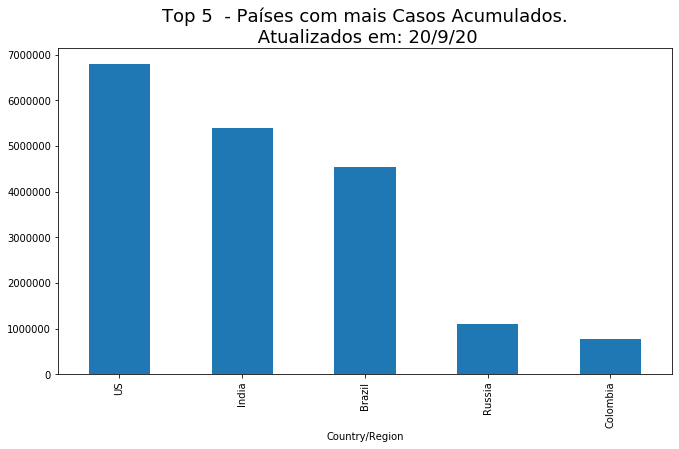

In [116]:
casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title(f'Top 5  - Países com mais Casos Acumulados.\n Atualizados em: {data_atual_confirmados_formatada}', fontsize=18)
plt.show()

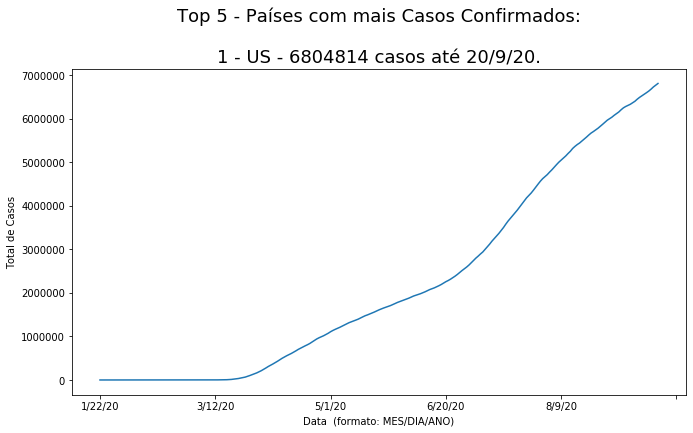

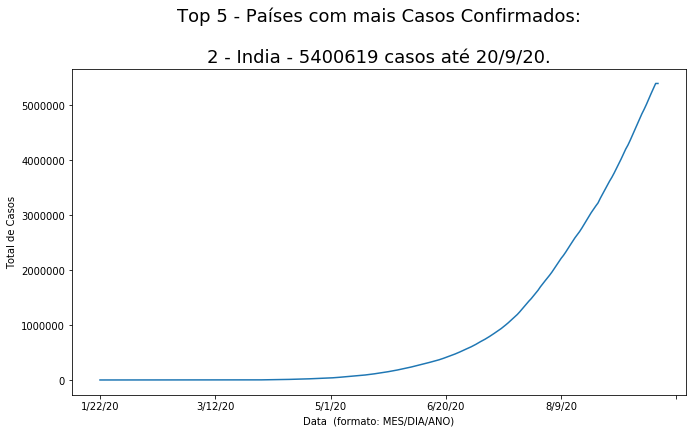

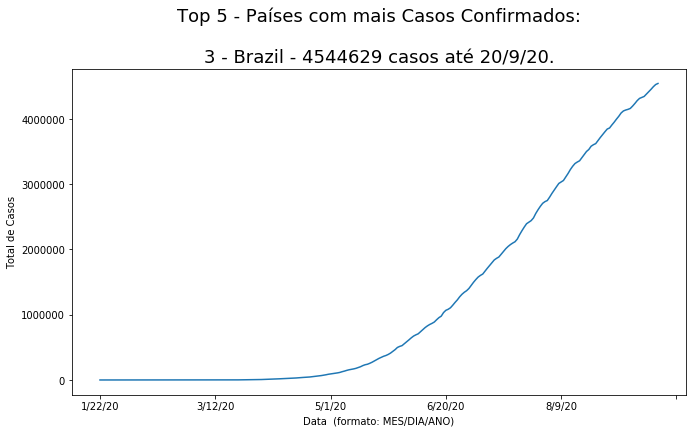

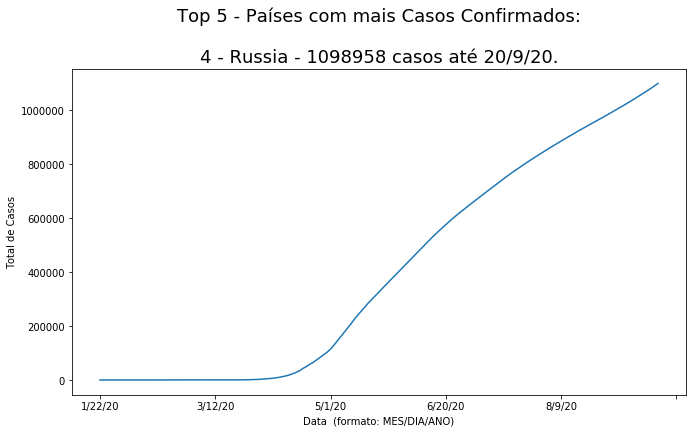

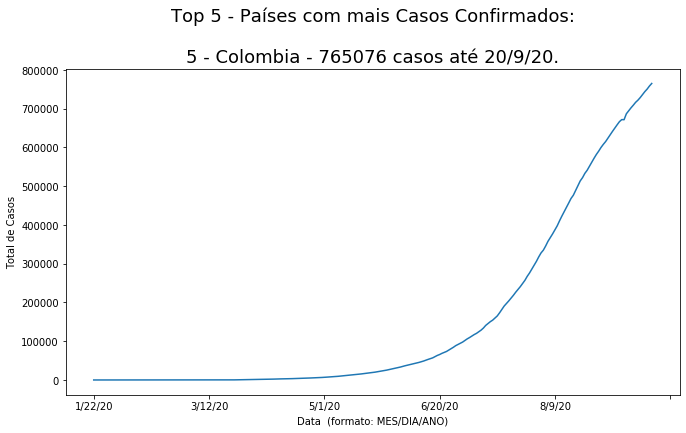

In [117]:
# Plota os graficos de cada país no top 5
for posicao, i in enumerate(top5):
    total = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().loc[i]
    plot_total_casos_pais(casos_confirmados, 
                          i,
                          'Top 5 - Países com mais Casos Confirmados:\n\n' 
                          + str(posicao+1) 
                          + ' - ' + str(i)
                          + ' - ' + str(total) + f' casos até {data_atual_confirmados_formatada}.',
                          data_final=data_atual_confirmados)


---


Como essa é uma visualização dos dados acumulados, ela pode não ser tão intuitiva para verificar a real proporção da propagação do virus, por esse motivo a proxima visão será de novos casos confirmados.

## Distribuição dos novos casos ao longo do tempo.

  Como o dataset nos proporciona uma visão acumulada dos dados, a regra utilizada para o calculo será a diferença entre a data posterior e a data anterior observada:
- Data posteriror - Data anterior = Quantidade de casos novos

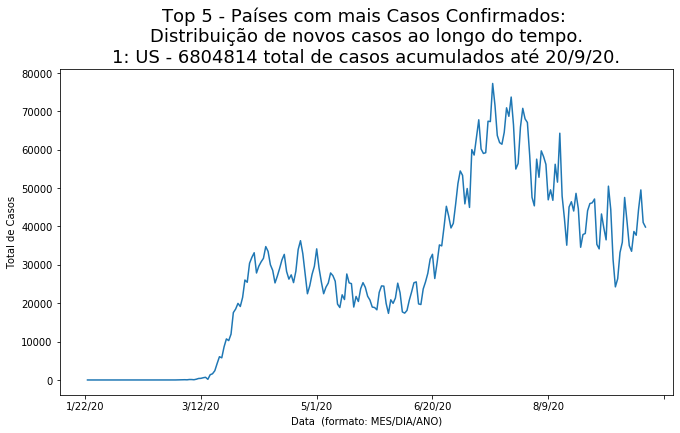

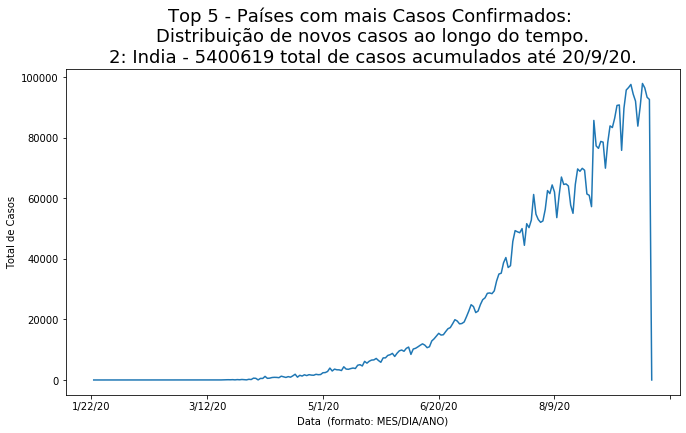

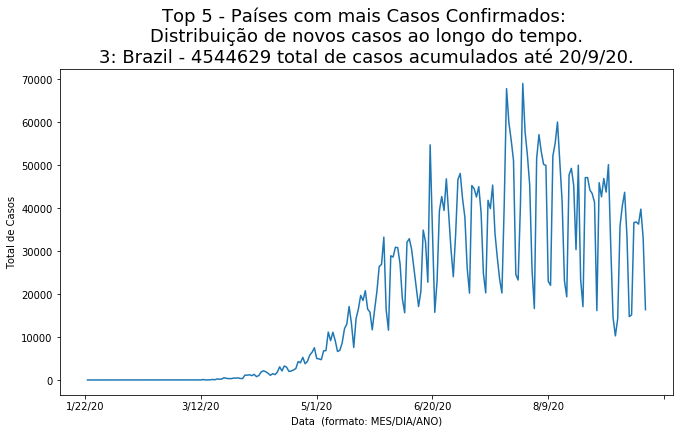

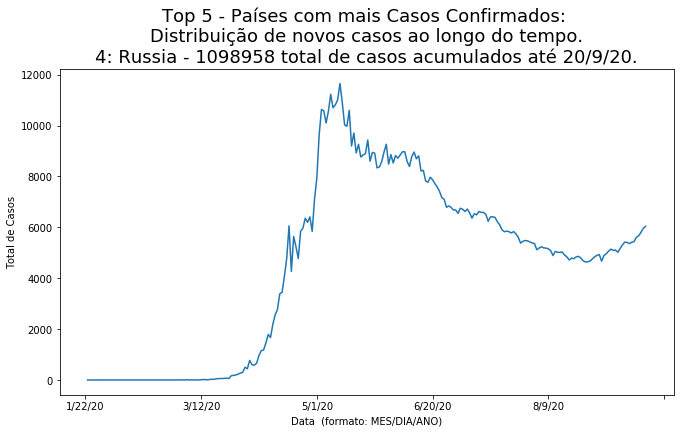

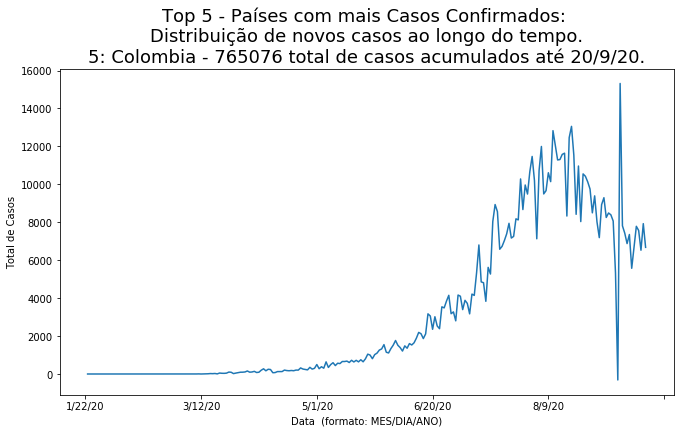

In [118]:
# Plota os graficos de cada país no top 5
for posicao, i in enumerate(top5):
    total = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().loc[i]
    plot_novos_casos_pais(casos_confirmados,
                          i,
                          'Top 5 - Países com mais Casos Confirmados: \nDistribuição de novos casos ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + f' total de casos acumulados até {data_atual_confirmados_formatada}.',
                          data_final=data_atual_confirmados)


## Análise das Mortes

## Top 5 - Países com mais casos de mortes

In [119]:
top5_mortes = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False)[:5].index

print('Total de mortes acumuladas:\n\n',mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False).head())

Total de mortes acumuladas:

 Country/Region
US                199509
Brazil            136895
India              86752
Mexico             73493
United Kingdom     41866
Name: 9/20/20, dtype: int64


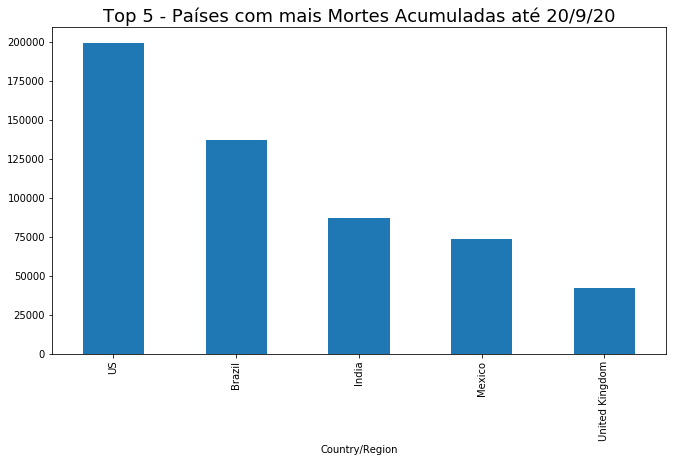

In [120]:
mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title(f'Top 5 - Países com mais Mortes Acumuladas até {data_atual_mortes_formatada}', fontsize=18)
plt.show()

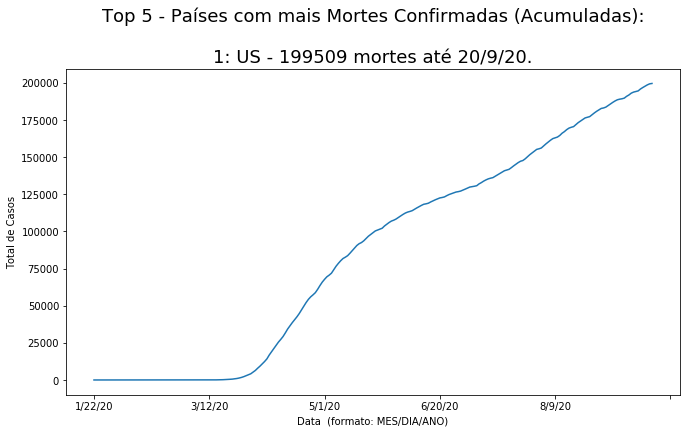

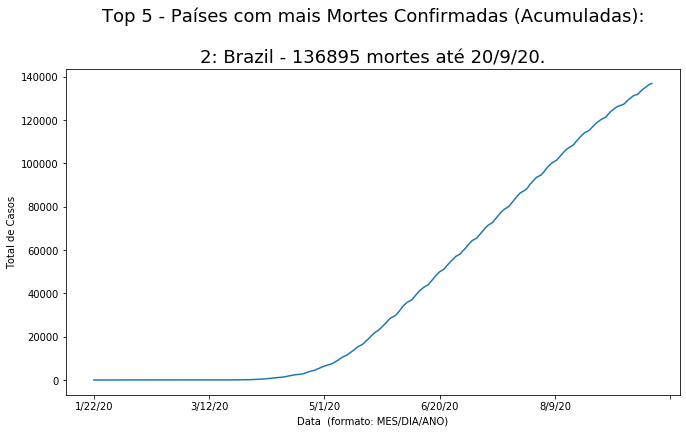

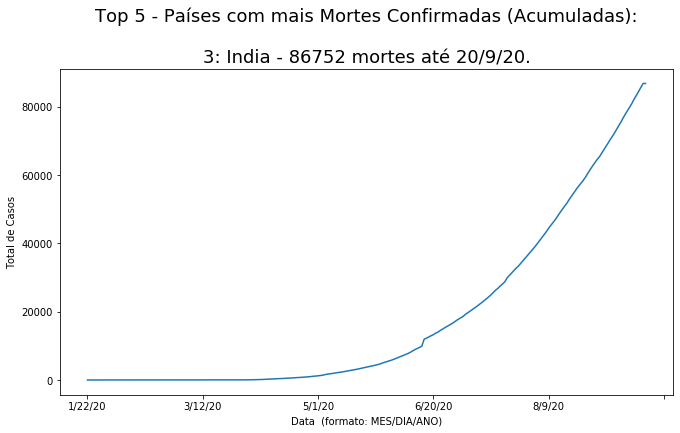

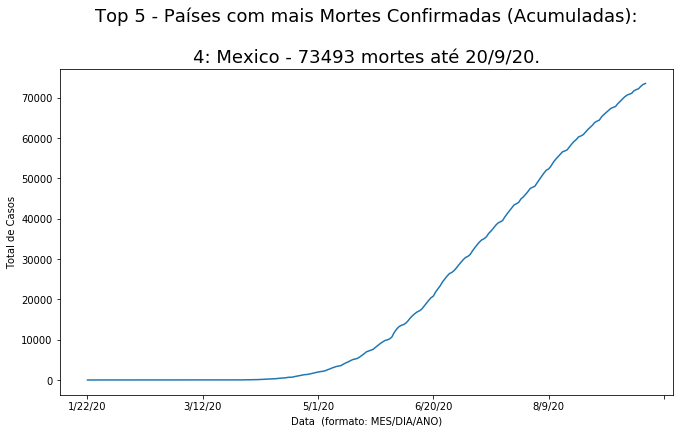

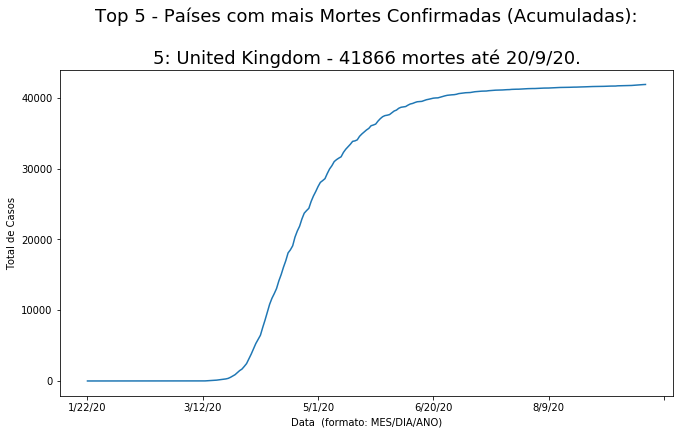

In [121]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top5_mortes):
    total = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().loc[i]
    plot_total_casos_pais(mortes_confirmadas,
                          i,
                          'Top 5 - Países com mais Mortes Confirmadas (Acumuladas):\n\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + f' mortes até {data_atual_mortes_formatada}.',
                          data_final=data_atual_confirmados)


## Distribuição das mortes ao longo do tempo.

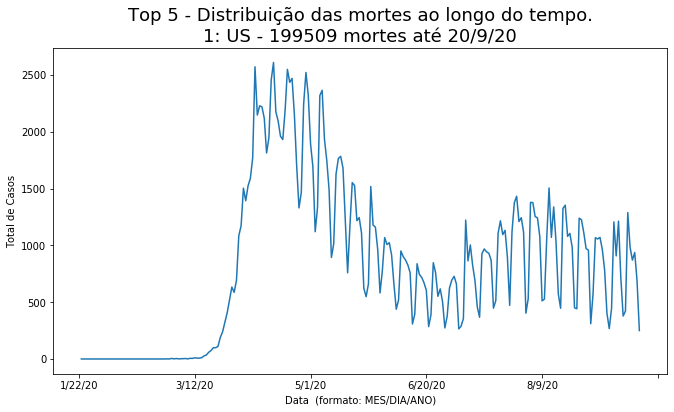

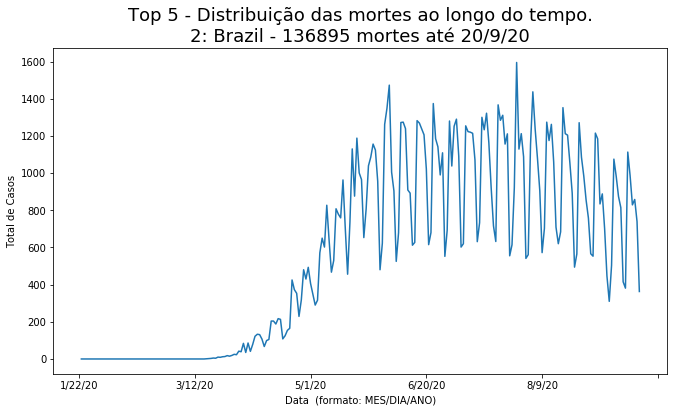

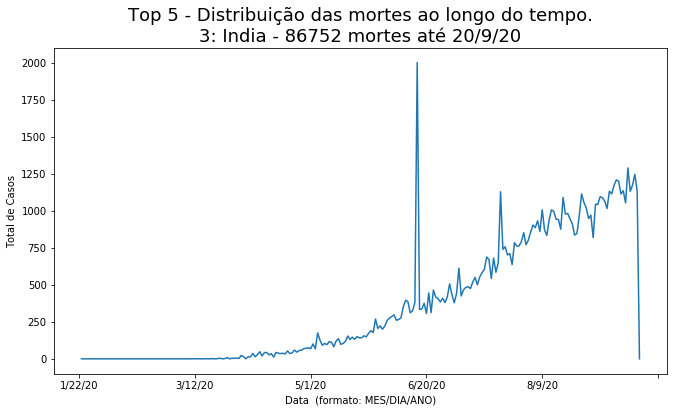

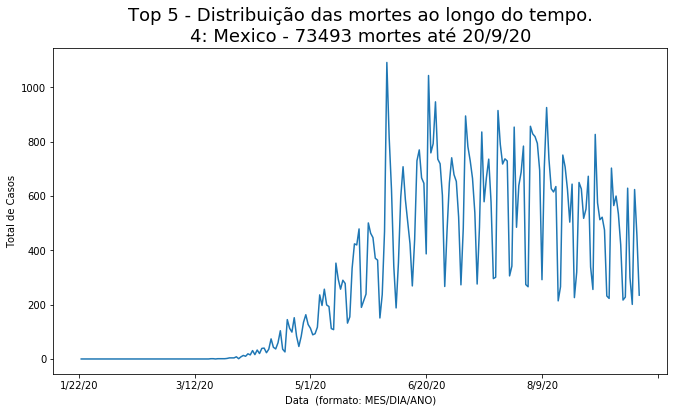

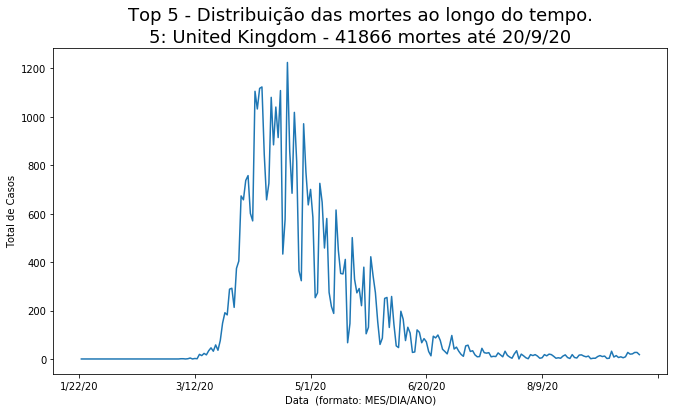

In [122]:
# Plota os graficos de cada país no top 5
for posicao, i in enumerate(top5_mortes):
    total = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().loc[i]
    plot_novos_casos_pais(mortes_confirmadas,
                          i,
                          'Top 5 - Distribuição das mortes ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + f' mortes até {data_atual_mortes_formatada}',
                          data_final=data_atual_mortes)


# Taxa de Letalidade

  Uma das métricas que pode nos dizer sobre o grau de gravidade de uma doença é sua taxa de letalidade, que é a proporção entre o número total de mortes e o total de casos.


**Fórmula:**


***Total de mortes / Total de casos confirmados***


In [123]:
# Cria o dataframe
casos = pd.concat([
    casos_confirmados.groupby('Country/Region').sum().iloc[:,-1],
    mortes_confirmadas.groupby('Country/Region').sum().iloc[:,-1]
], axis=1)

casos.columns = ['confirmados', 'mortes']

casos.head()

,confirmados,mortes
Country/Region,,
Afghanistan,39044,1441
Albania,12385,362
Algeria,49826,1672
Andorra,1564,53
Angola,3991,152


In [124]:
# taxa de letalidade dos paises com mais casos
casos['taxa_letalidade'] = casos['mortes'] / casos['confirmados']  * 100
casos.sort_values('confirmados', ascending=False)[:10]

,confirmados,mortes,taxa_letalidade
Country/Region,,,
US,6804814,199509,2.931880
India,5400619,86752,1.606334
Brazil,4544629,136895,3.012237
Russia,1098958,19349,1.760668
Colombia,765076,24208,3.164130
Peru,762865,31369,4.111999
Mexico,697663,73493,10.534169
South Africa,661211,15953,2.412694
Spain,640040,30495,4.764546


In [128]:
casos.describe()

,confirmados,mortes,taxa_letalidade
count,1.880000e+02,188.000000,188.000000
mean,1.645479e+05,5104.069149,2.727509
std,7.205545e+05,20112.131898,3.216297
min,9.000000e+00,0.000000,0.000000
25%,2.297250e+03,40.750000,1.067167
50%,1.044600e+04,215.500000,2.024618
75%,6.951900e+04,1216.250000,3.162651
max,6.804814e+06,199509.000000,28.923988


  Com o resumo estatístico dos dados podemos ver alguns pontos sobre a distribuição dos dados, como a diferença dos primeiros colocados no rank de mais casos, o que pode influênciar ou dificultar as análises dos casos.


  Para evitar o impacto disso e facilitar as visualizações, os dados serão divididos usando como referência seu 3° Quartil (valor que divide os dados em 2 grupos: 75% abaixo dele e 25% acima)

In [129]:
acima_q3 = casos[casos['confirmados'] > casos['confirmados'].quantile(0.75)]
q3 = casos[casos['confirmados'] <= casos['confirmados'].quantile(0.75)]
print('Quantidade de países no grupo acima do Terceiro Quartil:',acima_q3.shape[0],'\n Lista dos países:\n', list(acima_q3.index))
print('\nQuantidade de países incluidos no grupo do Terceiro Quartil:',q3.shape[0], '\n Lista dos países:\n', list(q3.index))

Quantidade de países no grupo acima do Terceiro Quartil: 47 
 Lista dos países:
 ['Argentina', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'France', 'Germany', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Mexico', 'Morocco', 'Netherlands', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'South Africa', 'Spain', 'Sweden', 'Turkey', 'US', 'Ukraine', 'United Arab Emirates', 'United Kingdom']

Quantidade de países incluidos no grupo do Terceiro Quartil: 141 
 Lista dos países:
 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cab

Text(0.5, 1.0, 'Grupo com mais casos Relatados.')

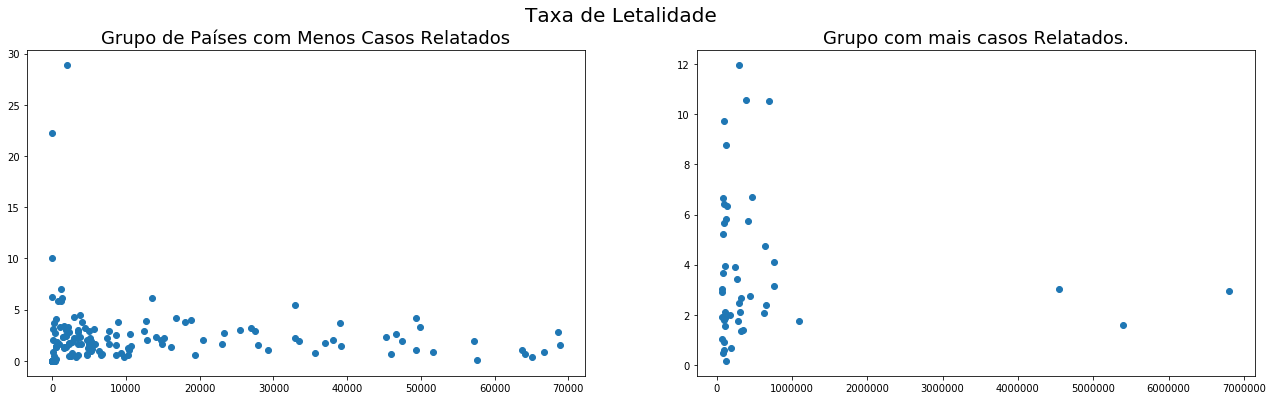

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,6))
fig.suptitle('Taxa de Letalidade', fontsize=20)
ax1.scatter(x='confirmados', y='taxa_letalidade', data=q3)
ax1.set_title('Grupo de Países com Menos Casos Relatados', fontsize=18)
ax2.scatter(x='confirmados', y='taxa_letalidade', data=acima_q3)
ax2.set_title('Grupo com mais casos Relatados.', fontsize=18)

# E o Brasil?

In [144]:
ultimos_25_dias = pd.to_datetime(data_atual_confirmados) 
ultimos_25_dias = ultimos_25_dias - datetime.timedelta(days=25)
ultimos_25_dias = str(ultimos_25_dias.month) + '/' + str(ultimos_25_dias.day) + '/' + str(ultimos_25_dias.strftime('%y'))
mes, dia, ano = ultimos_25_dias.split('/')
ultimos_25_dias_formatado = '/'.join((dia,mes,ano))
print('Situação do Brasil:')
print(casos.loc['Brazil'].round(2))

Situação do Brasil:
confirmados        4544629.00
mortes              136895.00
taxa_letalidade          3.01
Name: Brazil, dtype: float64


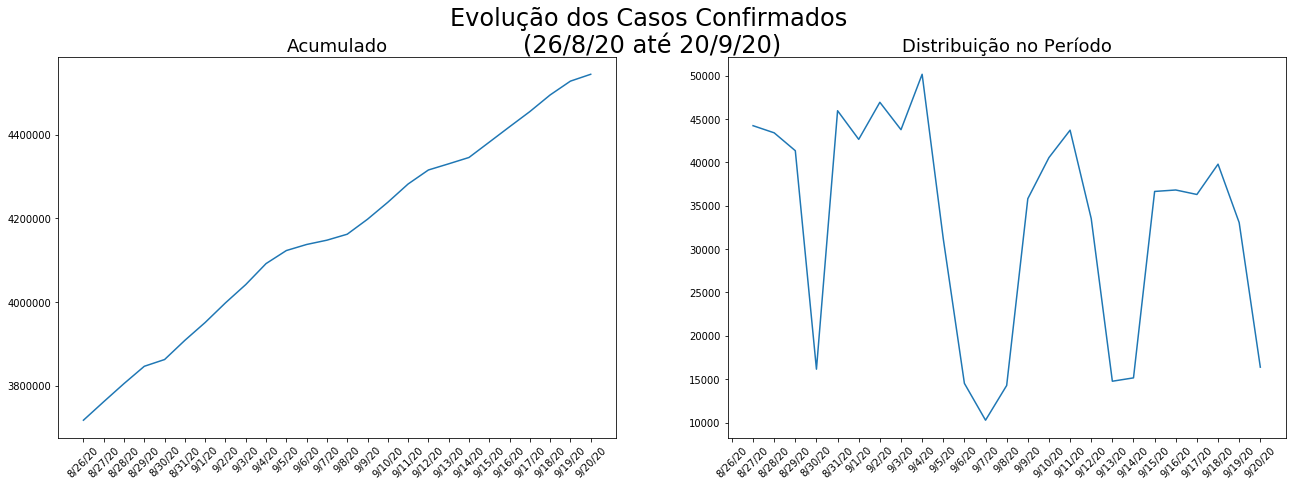

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7))
fig.suptitle(f'Evolução dos Casos Confirmados \n({ultimos_25_dias_formatado} até {data_atual_confirmados_formatada})', fontsize=24)
ax1.plot(casos_confirmados.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_25_dias:])
ax1.set_title('Acumulado', fontsize=18)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.plot(casos_confirmados.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_25_dias:].diff())
ax2.set_title('Distribuição no Período', fontsize=18)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

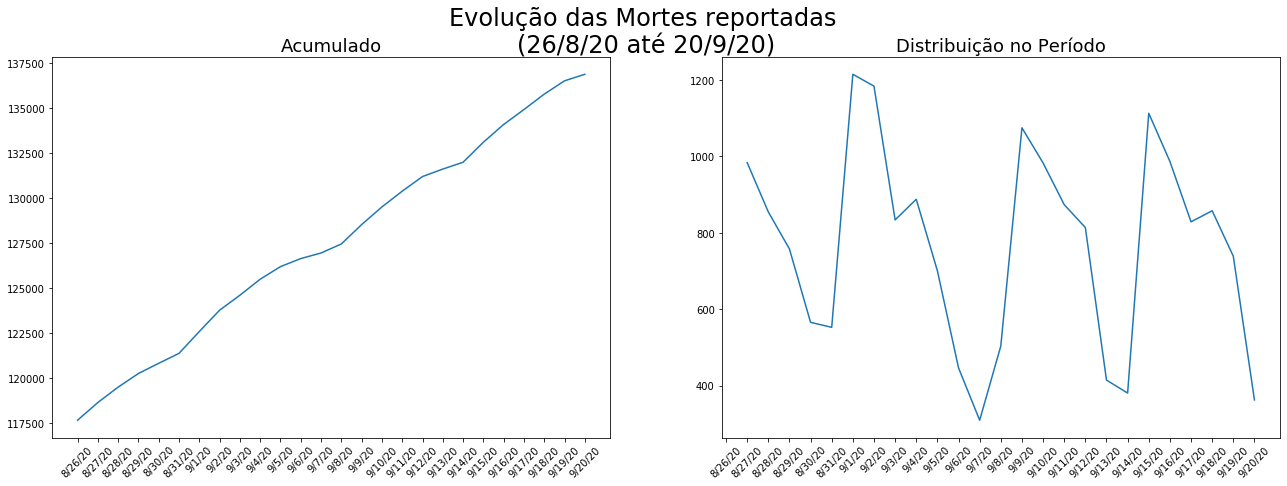

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7))
fig.suptitle(f'Evolução das Mortes reportadas \n({ultimos_25_dias_formatado} até {data_atual_mortes_formatada})', fontsize=24)
ax1.plot(mortes_confirmadas.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_25_dias:])
ax1.set_title('Acumulado', fontsize=18)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.plot(mortes_confirmadas.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_25_dias:].diff())
ax2.set_title('Distribuição no Período', fontsize=18)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

# Tabela com os dados dos 10 países com mais casos confirmados

In [150]:
print('\nTop 10 - Países com mais Casos confirmados')
display(casos.sort_values('confirmados', ascending=False).head(10))


Top 10 - Países com mais Casos confirmados


,confirmados,mortes,taxa_letalidade
Country/Region,,,
US,6804814,199509,2.931880
India,5400619,86752,1.606334
Brazil,4544629,136895,3.012237
Russia,1098958,19349,1.760668
Colombia,765076,24208,3.164130
Peru,762865,31369,4.111999
Mexico,697663,73493,10.534169
South Africa,661211,15953,2.412694
Spain,640040,30495,4.764546


# Tabela com os dados dos 10 países com mais mortes confirmadas

In [149]:
print('\nTop 10 - Países com mais mortes confirmadas')
casos.sort_values('mortes', ascending=False).head(10)


Top 10 - Países com mais mortes confirmadas


,confirmados,mortes,taxa_letalidade
Country/Region,,,
US,6804814,199509,2.931880
Brazil,4544629,136895,3.012237
India,5400619,86752,1.606334
Mexico,697663,73493,10.534169
United Kingdom,396744,41866,10.552397
Italy,298156,35707,11.975945
Peru,762865,31369,4.111999
France,467614,31257,6.684359
Spain,640040,30495,4.764546


# Total de Casos (Mundo)

In [151]:
print(f'Total de casos confirmados no mundo:\n{int(casos.sum()[0])} casos registrados')

Total de casos confirmados no mundo:
30935011 casos registrados


# Total de Mortes (Mundo)

In [152]:
print(f'Total de mortes no mundo: \n{int(casos.sum()[1])} mortes registradas' )

Total de mortes no mundo: 
959565 mortes registradas


# Taxa de letalidade mundial

In [153]:
print('Taxa de letalidade dos casos relatados no mundo: ',round(casos.sum()[1]/casos.sum()[0] * 100,2), '%')

Taxa de letalidade dos casos relatados no mundo:  3.1 %
